In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

### Checking all information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


 - All are ok with respect to their features.

## EDA

### Checking null values

In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

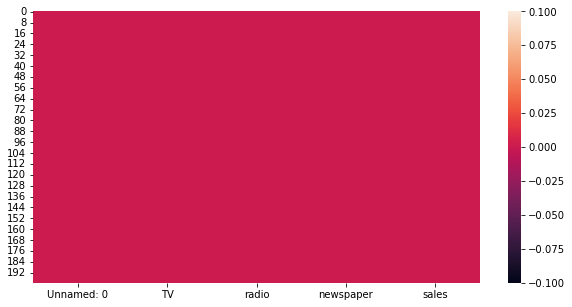

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

 - There is no null values present in dataset.

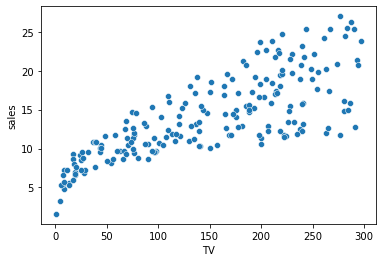

In [8]:
sns.scatterplot(x='TV',y='sales',data=data)
plt.show()

 - We can see, TV has linear Relationship with sales.
 - advertising on TV which increases sales.

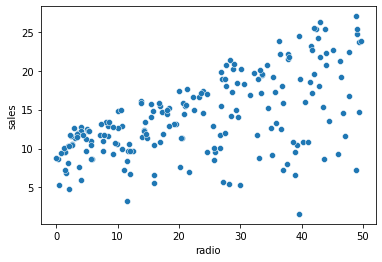

In [9]:
sns.scatterplot(x='radio',y='sales',data=data)
plt.show()

- Radio has a linear realtionship with sales.
- As we see advertising on radio which increase sales.

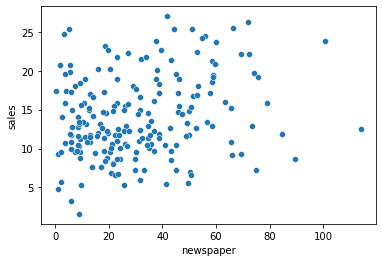

In [10]:
sns.scatterplot(x='newspaper',y='sales',data=data)
plt.show()

 - There is no relation in between newspaper and sales.
 - 1 to 60 in this range, the newspaper have maximum sales. 

## Describe the dataframe

In [11]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


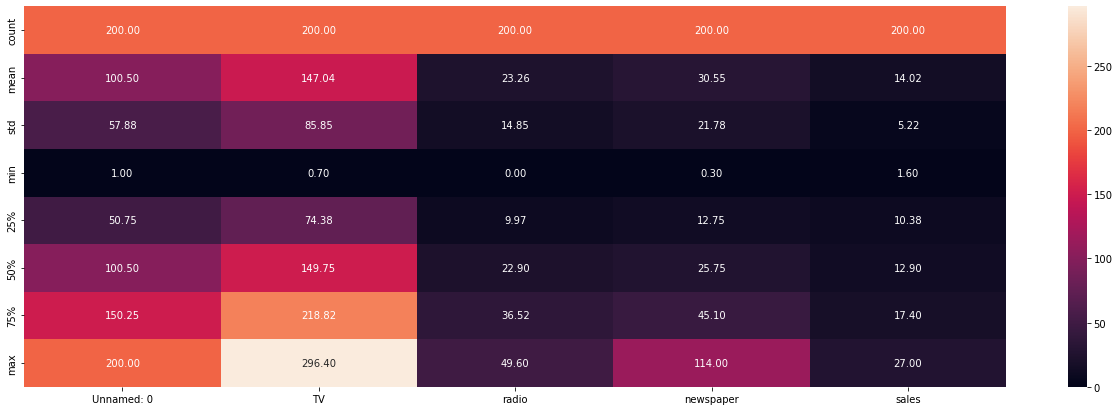

In [12]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(), annot=True, fmt="0.2f")
plt.show()

### Outcome of describe of datasets:

From the above plotting we are determining mean, standard deviation, minimum, and maximum value of each column. It helps us further in data cleaning.


Total Number of row in the datasets:
  1. 200 rows
  2. 5 columns
  
TV:
  1. Mean = 147.042500
  2. std = 85.854236
  3. max_value = 296.400000
  4. min_value = 0.700000
  
Radio:
  1. Mean = 23.264000	
  2. std = 14.846809
  3. max_value = 49.600000	
  4. min_value = 0.000000
  
newspaper:
  1. Mean = 30.554000
  2. std = 	21.778621
  3. max_vakue = 114.000000	
  4. min_value = 0.300000
  

## Correlation of the features with target column

In [13]:
data.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

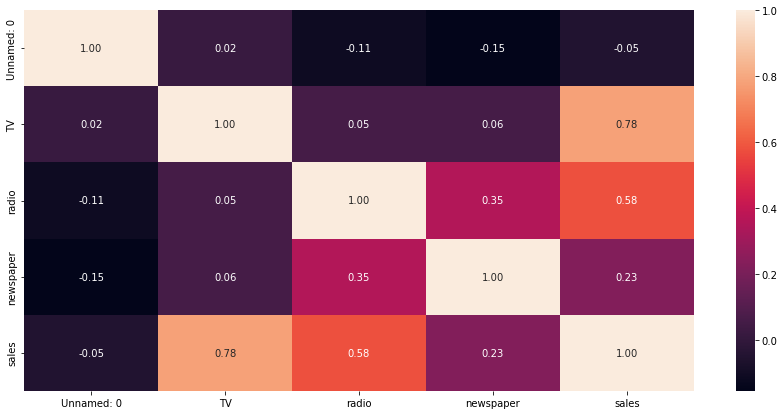

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation:

All the columns of the datasets is positively correlated with the target column.

  1. TV has 78% Positive correlation with the target column.
  2. Radio has 58% Positive correlation with the target column.
  3. Newspaper has 23% positive correlation with the target column.


## Checking Distribution

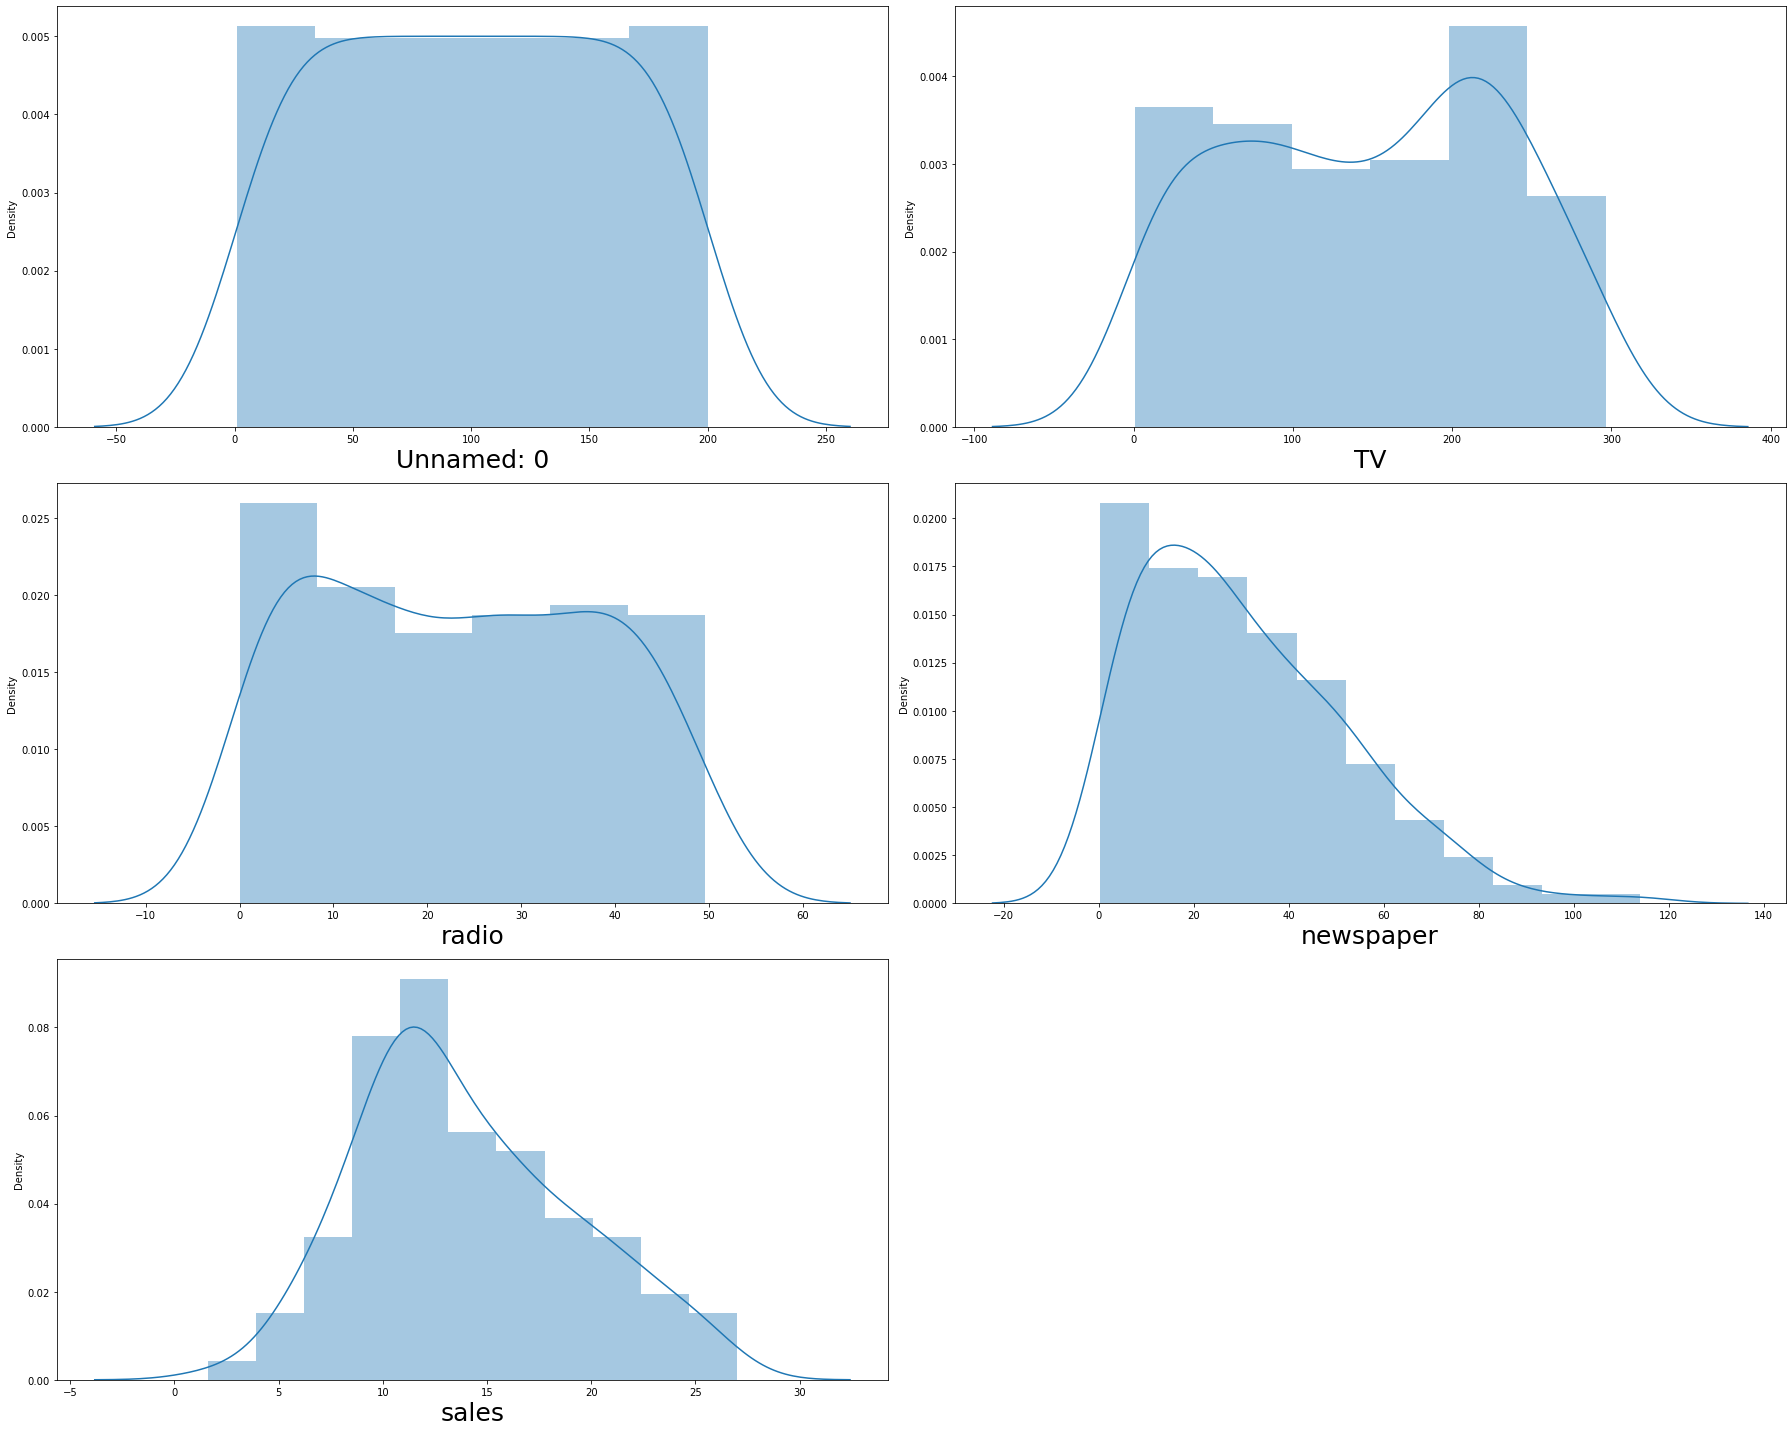

In [15]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=25)
    plotnumber +=1
plt.tight_layout()

In [16]:
data.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Newspaper is having negative skewness.
- Rest of the all feature is having positive skewness.


## Checking Outliers

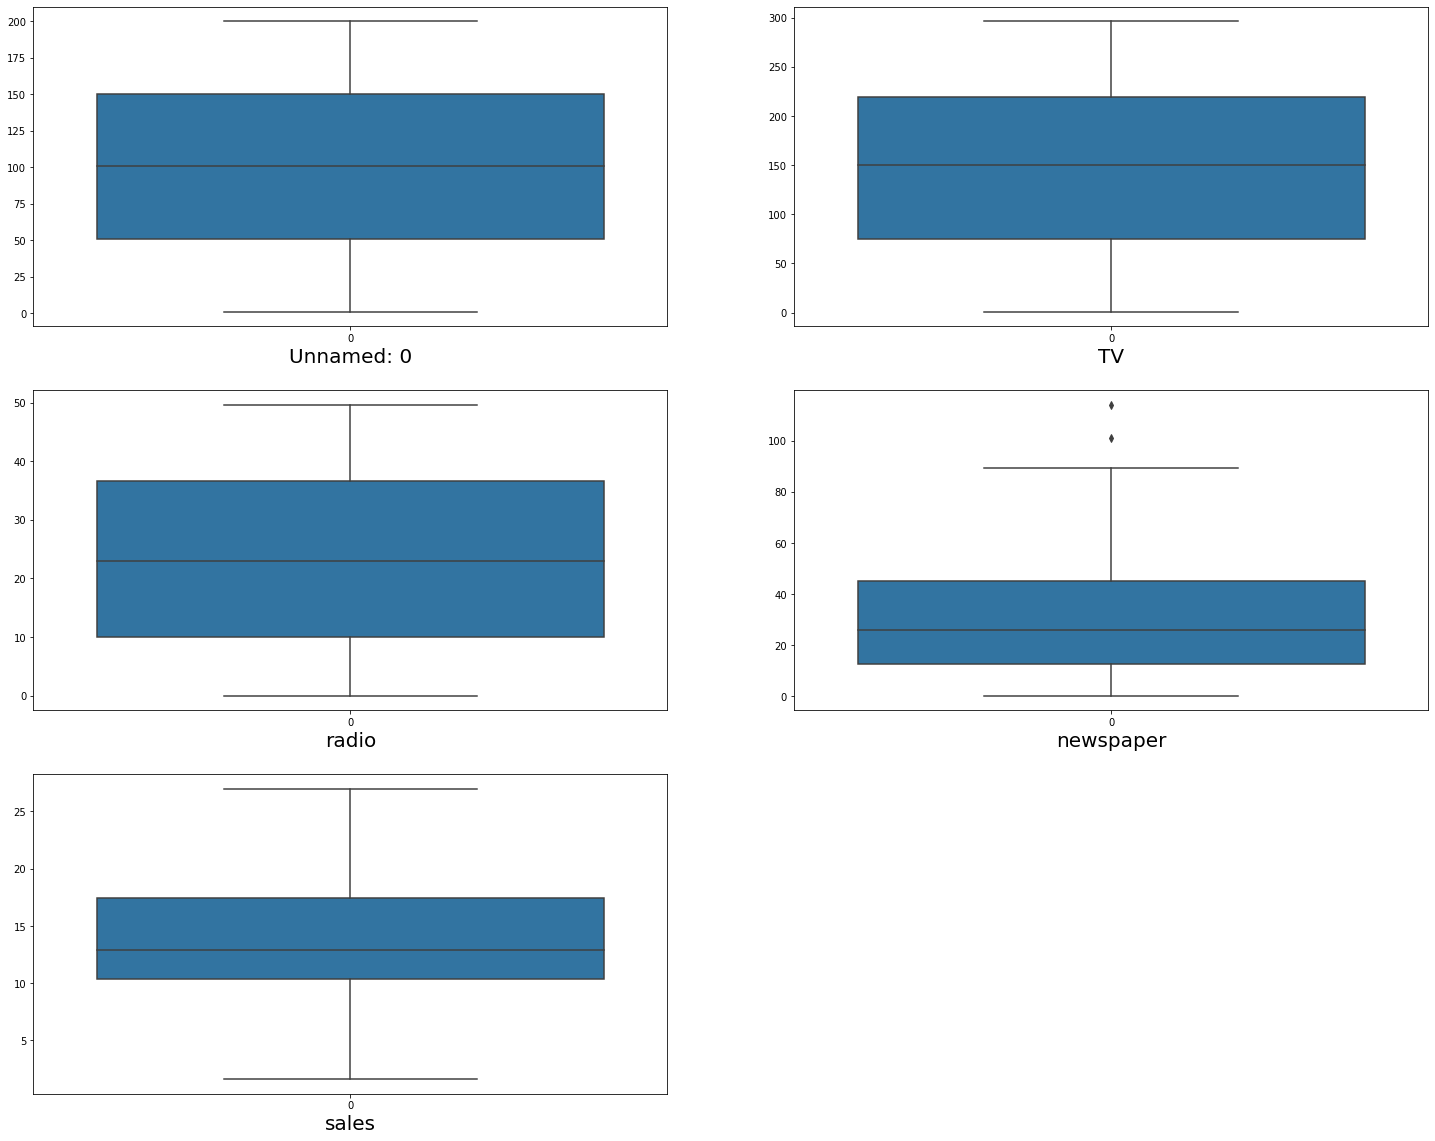

In [17]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data:
    if plotnumber <=6:
        plt.subplot(3,2,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- Newspaer has a outliers.
- Rest of all does not have outliers.

### Removing Outliers

In [18]:
from scipy.stats import zscore

z_score = zscore(data[['newspaper']])
abs_z_score = np.abs(z_score)    

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]

df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,100.914141,146.688384,23.130808,29.777273,13.980808
std,57.865657,85.443221,14.862111,20.446303,5.196097
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,51.250000,74.800000,9.925000,12.650000,10.325000
50%,100.500000,149.750000,22.400000,25.600000,12.900000
75%,150.750000,218.475000,36.325000,44.050000,17.375000
max,200.000000,293.600000,49.600000,89.400000,27.000000


In [19]:
df.shape

(198, 5)

### Percentage of Data Loss

In [20]:
data_loss = ((200 - 198)/198*100)
print(data_loss,'%')

1.0101010101010102 %


## Separating columns into features and label

In [21]:
x = df.drop(columns=['sales','Unnamed: 0'],axis=1)
y = df['sales']

In [22]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Transforming the data for removing skewnes

In [24]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [25]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [26]:
x.mean()

3.289549702593056e-17

In [27]:
x.std()

1.0

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
lr = LinearRegression()

### Finding Best Random stat

In [30]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9485659106556622 on Random State 209


In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.2, random_state=209)

In [32]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor(),
    'KNN Regressor' : KNeighborsRegressor(),
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [33]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,1.027,1.636,1.279207,0.950
Random Forest,0.707,0.754,0.868570,0.977
Gradient Boost Regressor,0.608,0.626,0.791384,0.981
XG Boost Regressor,0.752,0.873,0.934575,0.973
KNN Regressor,0.903,1.377,1.173571,0.958


In [34]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,0.608000,0.626000,0.791384,0.981000
Random Forest,0.707000,0.754000,0.868570,0.977000
XG Boost Regressor,0.752000,0.873000,0.934575,0.973000
KNN Regressor,0.903000,1.377000,1.173571,0.958000
Linear Regression,1.027000,1.636000,1.279207,0.950000


## Cross - Validation of the mode

In [35]:
gbt = GradientBoostingRegressor()
gbt.fit(X_train,y_train)


y_pred = gbt.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [36]:
for j in range(4,10):
    isscore = cross_val_score(gbt,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 97.92981408338257
accuracy_score is:- 98.07513898154629


At cv:- 5
Cross validation score is:- 97.82021902448498
accuracy_score is:- 98.07513898154629


At cv:- 6
Cross validation score is:- 97.69495675750059
accuracy_score is:- 98.07513898154629


At cv:- 7
Cross validation score is:- 97.71389420574525
accuracy_score is:- 98.07513898154629


At cv:- 8
Cross validation score is:- 97.92069922525405
accuracy_score is:- 98.07513898154629


At cv:- 9
Cross validation score is:- 97.68258286340799
accuracy_score is:- 98.07513898154629




In [37]:
lsscore_selected = cross_val_score(gbt,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.9788728461916901 
The accuracy score is:  0.9807513898154628


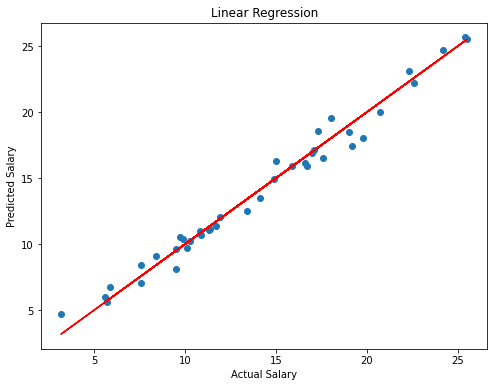

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test, color='r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression')
plt.show()

## Regularization

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [40]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1 ,10],
             'random_state':list(range(0,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'alpha': 0.1, 'random_state': 0}

In [41]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(X_train,y_train)
ls_score_training = ls.score(X_train,y_train)
pred_ls = ls.predict(X_test)
ls_score_training*100

89.59745558582206

In [42]:
pred = r2_score(y_test,pred_ls)
pred*100

94.8717689134124

In [43]:
cv_score = cross_val_score(ls,x,y,cv = 4)
cv_mean = cv_score.mean()
cv_mean*100

89.80785666814384

## Conclusion

### By using GradientBoosting Regression, we are getting model accuracy as 98.1% which show our model is performing  extremly well.

### Model Save

In [46]:
import pickle
hap = 'Advertising_sales_channel_prediction.pkl'
pickle.dump(gbt, open(hap, 'wb'))